# The Iris Dataset
This is perhaps the best known database to be found in the pattern recognition literature. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. You can get it on the following link: http://archive.ics.uci.edu/ml/datasets/Iris
It has the follwing attributes:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    * Iris Setosa
    * Iris Versicolour
    * Iris Virginica

## Getting the Dataset
First of all, lets import the relevant packages. As well as numpy we are also using [Pandas](http://pandas.pydata.org) - so we can handle and investigate the data.

In [1]:
import numpy as np
import pandas as pd

There are two ways we can import the data set - either from the CSV file at the UCI Machine Learning Repository or from SciKit-Learn.

### Direct from the UCI Machine Learning Repository
For this we use the handy [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function in Pandas. Just to check the data has loaded as expected, we can use the Pandas [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) or [tail](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html) function to see the first or last 5 rows.


In [2]:
iris_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                      header=None, 
                      names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Type"])
iris_df.tail()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Using Scikit-Learn
The dataset comes bundles with [Scikit-Learn](http://scikit-learn.org/stable/datasets/index.html) and can be easily accessed from the API. However the data is now an Numpy ndarray object - handy for using direct with SciKit-Learn.

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
iris.ar = iris.data
type(iris.ar)

numpy.ndarray

In [5]:
iris.ar

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

## Exploring the Data
Lets use the [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) to explore the dataset.

#### Basic descriptions
We can get a overview description of the whole data set using info and describe.

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Type            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris_df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


However this is of limited use as we are interested in each type or class separately. We can split the data using the [Pandas grouby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). So we can get a data summary by each Type of iris:

In [8]:
iris_df.groupby('Type').describe()

Petal Length                                               \
                       count   mean       std  min  25%   50%    75%  max   
Type                                                                        
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                Petal Width        ...  Sepal Length      Sepal Width         \
                      count   mean ...           75%  max       count   mean   
Type                               ...                                         
Iris-setosa            50.0  0.244 ...           5.2  5.8        50.0  3.418   
Iris-versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
Iris-virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                        
                      std  min    25%  50%    75%  max  
Type                                                    
Iris-setosa      0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
Iris-virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

We can now start to see differences in mean values for measurements between types, e.g., iris-setosa and iris-virginica petal length. We can look at just the mean:

In [9]:
iris_df.groupby('Type').mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Type,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<font color=red>Question - using the describe results above, which iris type is the linearly sperable one? </font>

## Plotting
Often a visual representation of the data can lead to more immediate insights compared with tabulated data. Lets see if we can visualise the data in a number of ways.
Lets start by importing [matplotlib](https://matplotlib.org) and set some global settings so we can see the plots properly in the Notebook.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [11]:
# Will allow us to embed images in the notebook
%matplotlib inline
%pylab inline
#Sets the figure size
pylab.rcParams['figure.figsize'] = (8, 8)

Populating the interactive namespace from numpy and matplotlib


Lets start off very simply by plotting the data in order as a normal line chart. We can add horizonatal lines to distinguish each type as they are ordered in the data frame. We can easily do this within Pandas itself using its built in plot function. This is a wraper around many of matplotlib plotting routines. We have plotted each feature against the Iris type - the data is grouped with each of the 50 data points of each Iris type together in the dataset.

Use the matplotlib [manuals](https://matplotlib.org/), guides, [introductions](https://matplotlib.org/tutorials/index.html) and [cheatsheet](https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet) to try and undertand how we've added the vertical lines and controlled the x axis labels.

([<matplotlib.axis.XTick at 0x1a11e14710>,
 <a list of 3 Text xticklabel objects>)

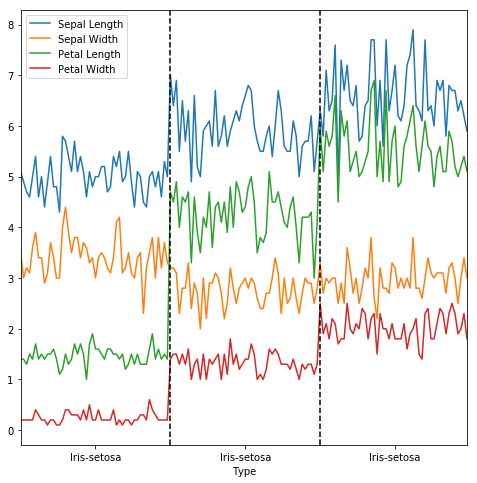

In [12]:
iris_df.plot(x='Type')
plt.axvline(x=50, color='k', ls='--')
plt.axvline(x=100, color='k', ls='--')
plt.axvline(x=150, color='k', ls='--')
plt.xticks(np.arange(25, 150, 50))

This gives some insight but is a little confusing and not the best plot to visualise the data.
Have a look at the [Pandas Visualisation](https://pandas.pydata.org/pandas-docs/stable/visualization.html) guide and see what plots might be more appropriate. Have a go at implementing some of these.
One way to see how each measurement varies by type is to use a [Box and whisker Plot](https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots). This indicates range, the median and the quartiles for each measurement. I can plot this by the iris type to see how these vary for each measurement.
I can do this to compare against different things - lets start by comparing the measurements or features for each class separately.

Iris-setosa             AxesSubplot(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

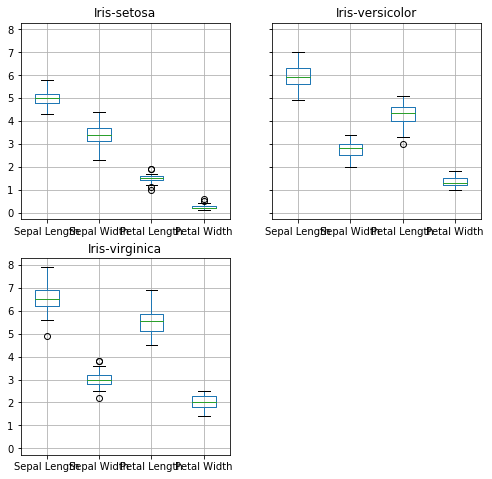

In [13]:
iris_df.groupby('Type').boxplot()

Although this is interesting, if we wanted to classify the data we might be better off rearranging so we compare each type of iris for each measurement feature:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a12257358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a12425240>]], dtype=object)

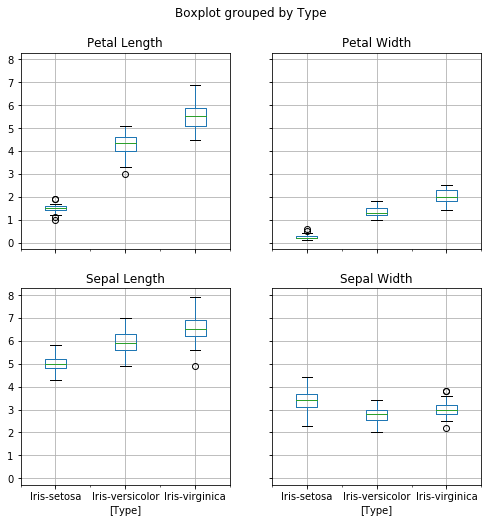

In [14]:
iris_df.boxplot(by='Type', layout=(2,2))

This plot allows us to see quickly that Iris-setosa is linearly separable from the other types for the petal width and petal length features. Remember this!!

Finally lets plot Petal Width against Petal Length to see this separation in more detail. For clarity lets plot each Iris type as a seperate color on the same plot. This plot will form one of the ways we will visualise the models our machine learning examples produce.

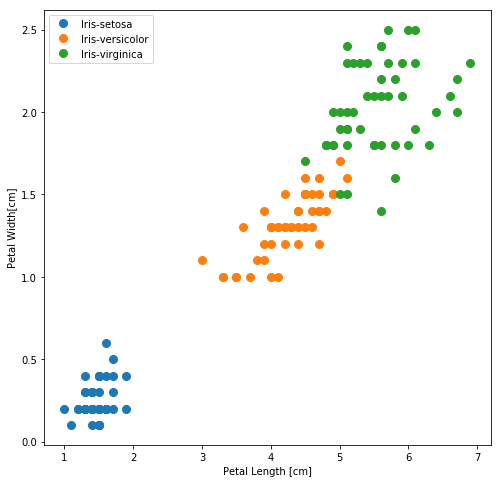

In [15]:
groups = iris_df.groupby('Type')
# Plot
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['Petal Length'], group['Petal Width'], marker='o', linestyle='', ms=8, label=name)
    
plt.xlabel('Petal Length [cm]')
plt.ylabel('Petal Width[cm]')
ax.legend(loc='upper left')
plt.show()

<font color=red>If you were asked to choose to draw straight lines on this plot that seperated the 3 different Iris types, where would you draw them? What shape lines would you draw to get regions that are completely separate?</font>